In [9]:
# 1. Load & Clean Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ================================
# 1. Load & Clean Dataset
# ================================
file_path = "Data player virat.csv"

# Skip the first row (title row), use actual headers
df = pd.read_csv(file_path, skiprows=1)
df.columns = df.iloc[0]   # set column names
df = df.drop(0).reset_index(drop=True)

# Convert numeric columns
numeric_cols = ["Runs", "BF", "SR", "4s", "6s"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# ✅ Fix: Convert Start Date using correct format
df["Start Date"] = pd.to_datetime(df["Start Date"], format="%d-%b-%y", errors="coerce")

print("✅ Data cleaned successfully!\n")
print(df.head())

✅ Data cleaned successfully!

0 Bat1  Runs    BF      SR   4s   6s      Opposition         Ground Start Date
0   28  28.0  19.0  147.36  5.0  0.0  v South Africa         Durban 2011-01-09
1   14  14.0  12.0  116.66  2.0  0.0   v West Indies  Port of Spain 2011-06-04
2    4   4.0   5.0   80.00  0.0  0.0       v England     Manchester 2011-08-31
3   15  15.0  16.0   93.75  3.0  0.0       v England   Eden Gardens 2011-10-29
4   22  22.0  21.0  104.76  0.0  1.0     v Australia         Sydney 2012-02-01



--- Summary Statistics ---
0            Runs          BF          SR          4s          6s
count  106.000000  106.000000  106.000000  106.000000  106.000000
mean    37.566038   27.207547  123.421509    3.330189    1.094340
std     27.946213   17.086735   50.063401    3.010210    1.476987
min      0.000000    1.000000    0.000000    0.000000    0.000000
25%     13.250000   12.000000  100.735000    1.000000    0.000000
50%     30.500000   24.500000  130.380000    2.000000    1.000000
75%     59.000000   41.750000  153.615000    5.000000    1.000000
max    122.000000   61.000000  241.370000   12.000000    7.000000


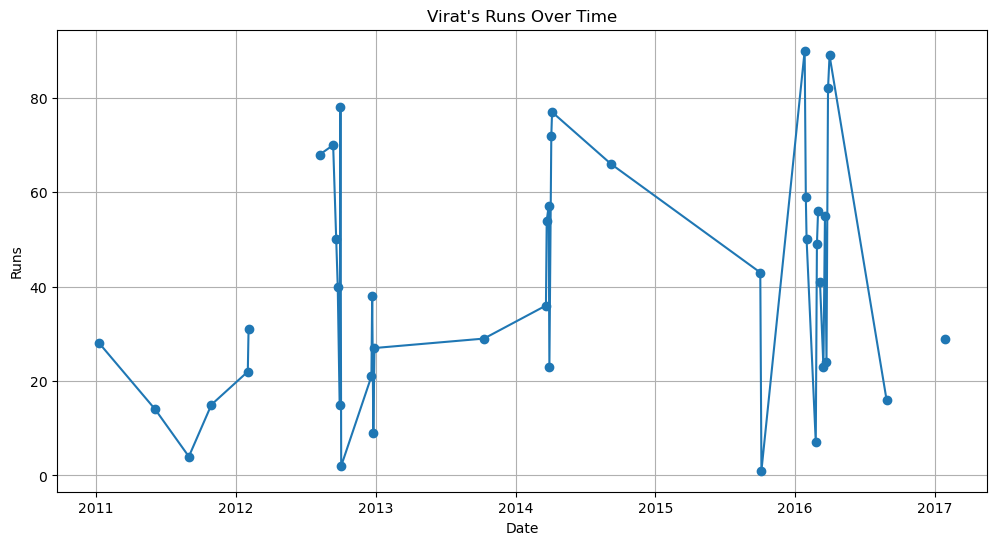

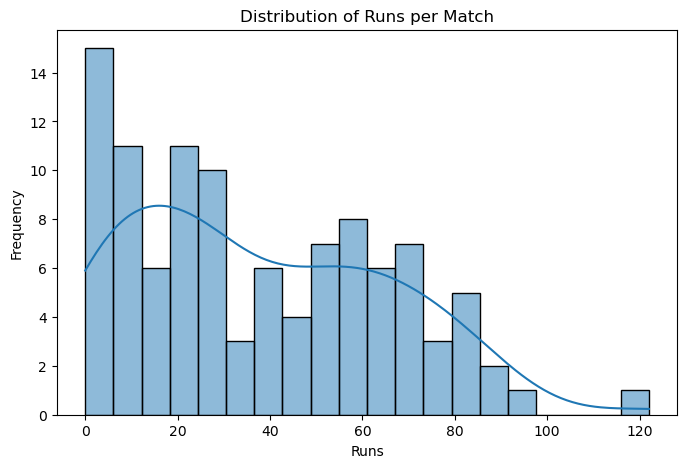

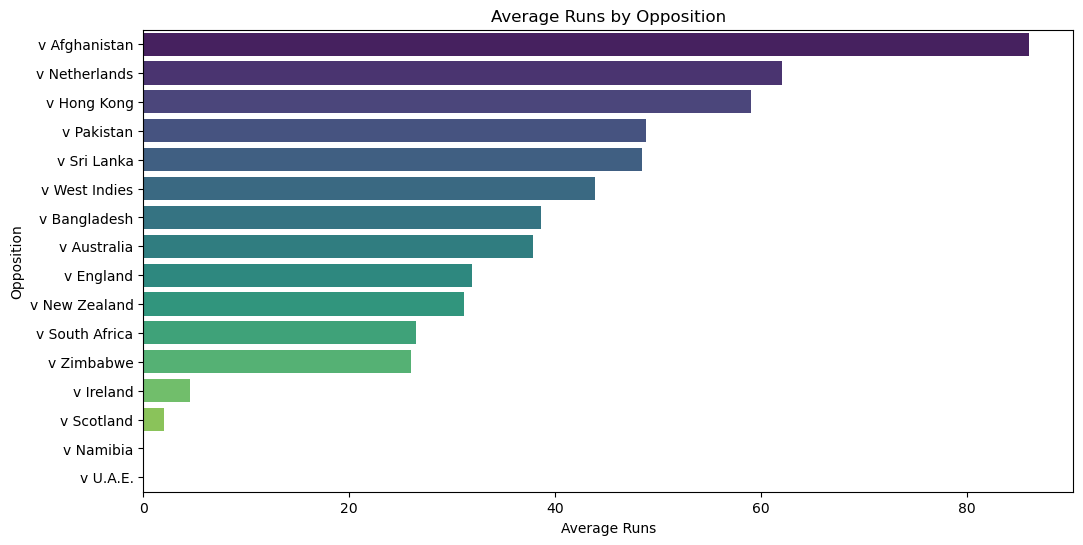

In [5]:
# ================================
# 2. Exploratory Data Analysis (EDA)
# ================================
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["Runs", "BF", "SR", "4s", "6s"]

print("\n--- Summary Statistics ---")
print(df[numeric_cols].describe())

# 1️⃣ Runs over time
plt.figure(figsize=(12,6))
plt.plot(df["Start Date"], df["Runs"], marker="o", linestyle="-")
plt.title("Virat's Runs Over Time")
plt.xlabel("Date")
plt.ylabel("Runs")
plt.grid(True)
plt.show()

# 2️⃣ Distribution of Runs
plt.figure(figsize=(8,5))
sns.histplot(df["Runs"].dropna(), bins=20, kde=True)
plt.title("Distribution of Runs per Match")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

# 3️⃣ Average Runs by Opposition 
plt.figure(figsize=(12,6))
avg_runs_opp = df.groupby("Opposition")["Runs"].mean().sort_values(ascending=False)

sns.barplot(
    x=avg_runs_opp.values,
    y=avg_runs_opp.index,
    hue=avg_runs_opp.index,   
    palette="viridis",
    dodge=False,
    legend=False
)

plt.title("Average Runs by Opposition")
plt.xlabel("Average Runs")
plt.ylabel("Opposition")
plt.show()



--- Linear Regression ---
R²: 0.9816996372319793
MAE: 3.052716161693925
RMSE: 4.078958613030218

--- Random Forest ---
R²: 0.9682570385790125
MAE: 3.033636363636364
RMSE: 5.372088640709158


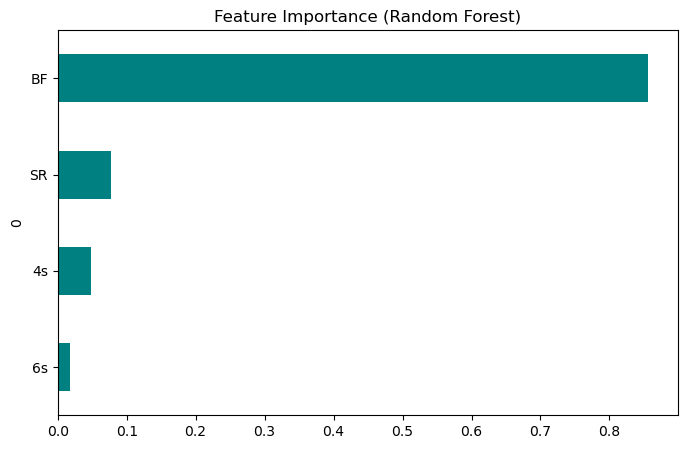

In [7]:
3# Predictive Modeling
# ================================
# Features & Target
X = df[["BF", "SR", "4s", "6s"]]
y = df["Runs"]

# Drop missing values
X = X.dropna()
y = y.loc[X.index]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Linear Regression ---
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_test)

print("\n--- Linear Regression ---")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# --- Random Forest ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest ---")
print("R²:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# Feature Importance from Random Forest
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
feat_importances.sort_values().plot(kind="barh", color="teal")
plt.title("Feature Importance (Random Forest)")
plt.show()


In [8]:
# 4. Insights
# ================================
print("\n--- Insights ---")
print(f"- Virat's highest score in dataset: {df['Runs'].max()}")
print(f"- Average runs: {df['Runs'].mean():.2f}")
print(f"- Best opposition: {avg_runs_opp.index[0]} ({avg_runs_opp.iloc[0]:.2f} avg runs)")
print(f"- Boundaries (4s & 6s) strongly influence predictions (see feature importance plot).")


--- Insights ---
- Virat's highest score in dataset: 122.0
- Average runs: 37.57
- Best opposition: v Afghanistan (86.00 avg runs)
- Boundaries (4s & 6s) strongly influence predictions (see feature importance plot).
